# <center> Investment Analysis - Spark Funds </center>
### Business Objective
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

In [95]:
import numpy as np
import pandas as pd

In [96]:
# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## <center>Checkpoint 1: Data Cleaning 1</center>
Loading companies and rounds2 CSV files with 'palmos' encoding style.

In [98]:
# Reading companies.csv file
companies = pd.read_csv('companies.csv', encoding='palmos', engine='python')
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [99]:
# Reading rounds2.csv file
rounds2 = pd.read_csv('rounds2.csv', encoding='palmos', engine='python')
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


***
We can observe that the last few entries in both the dataframes have charaters that are not in proper encoded format (utf-8).
***

In [100]:
# Converting the 'permalink' and 'name' columns of companies dataframe to UTF-8 encoding 
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
companies['name'] = companies['name'].str.encode('utf-8').str.decode('ascii', 'ignore')

In [101]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [102]:
# Converting the 'company_permalink' column of rounds2 dataframe to UTF-8 encoding
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


***
We can see now the rows have been cleaned with correct encoding formats.
***

### Unique companies count for _`companies`_ and _`rounds2`_ DataFrames
We can observe the values in __company_permalink__ has a combination of upper and lower cases. <br>
Hence transforming the column __permalink__ of companies and __company_permalink__ of rounds2 to an uniform lowercase.
Also fixing the space issue in both the columns mentioned above.

In [103]:
companies['permalink'] = companies['permalink'].transform(lambda x : x.lower())
rounds2['company_permalink'] = rounds2['company_permalink'].transform(lambda x : x.lower())
companies['permalink'] = companies['permalink'].transform(lambda x : x.replace(' ', ''))
rounds2['company_permalink'] = rounds2['company_permalink'].transform(lambda x : x.replace(' ', ''))

In [104]:
# checking uniques for the permalink column
companies['permalink'].nunique()

66368

In [105]:
# checking uniques for the company_permalink column
rounds2['company_permalink'].nunique()

66368

In [106]:
# chekcing for uniques using describe function
companies['permalink'].describe()

count                        66368
unique                       66368
top       /organization/handup-pbc
freq                             1
Name: permalink, dtype: object

In [107]:
# chekcing for uniques using describe function
rounds2['company_permalink'].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

***
We can observe that the number of uniques for column __`permalink of companies`__ and __`company_permalink of rounds2`__ DataFrames are the __same__.
***

In [108]:
# checking if any companies in rounds2 is present in companies dataframe
companies[~(companies['permalink'].isin(rounds2['company_permalink']))]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


***
We can observe that there are __`no separate/unique entries`__ in rounds2 that are not present in companies dataframe.
***
### Merge `companies` and `rounds2` DataFrames

In [109]:
# merging on permalink and company_permalink columns
master_frame = pd.merge(companies, rounds2, left_on='permalink', right_on='company_permalink')
master_frame.shape

(114949, 16)

In [110]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## <center>Checkpoint 2: Funding Type Analysis</center>
### Investment type analysis

In [111]:
# get various investment types
master_frame['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [112]:
# checking null values count in master_frame
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

***
We can remove few columns as they are not required for investment analysis.<br>
Columns like homepage_url, state_code, region, founded_at, funding_round_permalink and funded_at can be removed.
***

In [113]:
master_frame.drop(
    ['homepage_url', 'state_code', 'region', 'founded_at', 'funding_round_permalink', 'funded_at'], axis=1, inplace=True)

In [114]:
master_frame.shape

(114949, 10)

In [115]:
# summary statistics for the column raised_amount_usd
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

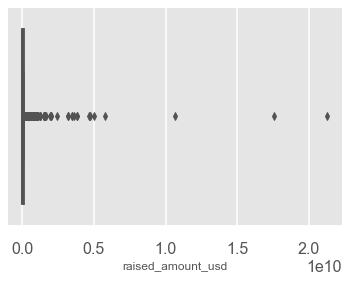

In [116]:
# Box plot for raised_amount_usd
sns.boxplot(master_frame['raised_amount_usd'])
plt.show()

***
We can observe the presence of outliers in raised_amount_usd column. However we are retaining them as they are __`valid investments`__.
***

In [117]:
# Checking null values for raised_amount_usd column
master_frame['raised_amount_usd'].isnull().sum()

19990

Dropping rows with null values in column raised_amount_usd as they dont add any value to analysis.

In [118]:
# Dropping null values from raised_amount_usd column
master_frame.dropna(subset=['raised_amount_usd'], inplace=True)

In [119]:
# Checking null values for raised_amount_usd column
master_frame.isnull().sum()

permalink                 0
name                      1
category_list          1044
status                    0
country_code           5851
city                   7045
company_permalink         0
funding_round_type        0
funding_round_code    66790
raised_amount_usd         0
dtype: int64

In [120]:
master_frame.shape

(94959, 10)

***
Spark Funds are considering funding types venture, angel, seed, and private equity.
Filtering out other investment types and retaining only these 4 types.
***

In [121]:
master_frame = master_frame[
    (master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'angel') | 
    (master_frame['funding_round_type'] == 'seed') | (master_frame['funding_round_type'] == 'private_equity')
]
master_frame_copy = master_frame # required for plotting in checkpoint 6
master_frame.shape

(80627, 10)

#### Calculating the most representative value of the investment amount for each funding types

In [122]:
master_frame.pivot_table(index='funding_round_type', aggfunc={'raised_amount_usd': np.median})

,raised_amount_usd
funding_round_type,
angel,400000.0
private_equity,20000000.0
seed,275000.0
venture,5000000.0


Based on the observations made, we come to a conclusion that __`VENTURE`__ type funding is the most suitable investment type for Spark Funds as it falls in the USD 5-15 million criteria.

| Investment Type | Total Investments | Average Investment (USD) |
| :- | :-: | -: |
| __Venture__ | __50228__ | __5_000_000__
| Angel | 4860 | 450_000
| Seed | 23603 | 275_000
| Private Equity | 1936 | 20_000_000

Before proceeding with the country analysis, filtering the master_frame data to contain only investments of the chosen type - `Venture`.

In [123]:
# filtering the master_frame to have only venture type funding data
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
master_frame.shape

(50228, 10)

## <center>Checkpoint 3: Country Analysis</center>
### Country Analysis
Identifying the top 3 countries (English speaking - De Facto and De Jure) with the highest investments.<br>

In [124]:
# loading countries csv file with english speaking countries
countries = pd.read_csv('countries.csv', engine='python')
countries.head()

,country,country_code
0,Australia,AUS
1,New Zealand,NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda,ATG


In [125]:
# merging venture_funded_companies with countries to get english speaking countries invested in venture type
master_frame = pd.merge(master_frame, countries, on='country_code')
master_frame.shape

(41927, 11)

Earlier there were 50228 entires and now 41927 indicating filteration of non english speaking countries.

In [126]:
# getting total (sum) investments country wise 
country_wise_investments = master_frame.pivot_table(index=['country_code', 'country'], aggfunc={'raised_amount_usd': np.sum})
country_wise_investments.head()

,,raised_amount_usd
country_code,country,
ARE,United Arab Emirates,3.426175e+08
AUS,Australia,1.322935e+09
BGD,Bangladesh,7.002000e+06
BWA,Botswana,2.250000e+06
CAN,Canada,9.583332e+09


In [127]:
# getting top 9 highly invested countries in the venture type investment
top9 = country_wise_investments.sort_values(by='raised_amount_usd', ascending=False).head(9)
top9['raised_amount_usd'] = top9['raised_amount_usd'].apply(lambda x: '%.2f' % x)
top9

,,raised_amount_usd
country_code,country,
USA,United States,422510842796.00
GBR,United Kingdom,20245627416.00
IND,India,14391858718.00
CAN,Canada,9583332317.00
ISR,Israel,6907514579.00
SGP,Singapore,2793917856.00
IRL,Ireland,1676131350.00
AUS,Australia,1322934948.00
MYS,Malaysia,883058787.00


In [128]:
# The top 3 countries with highest investments in venture type
top9.head(3)

,,raised_amount_usd
country_code,country,
USA,United States,422510842796.00
GBR,United Kingdom,20245627416.00
IND,India,14391858718.00


In [129]:
top3 = top9.head(3).index.get_level_values('country_code')
top3

Index(['USA', 'GBR', 'IND'], dtype='object', name='country_code')

Before proceeding with sector analysis, filtering the data and retaining only the top 3 countries related investment data.

In [130]:
# Filtering out remaining counries and retaining only top 3
master_frame = master_frame[master_frame['country_code'].isin(top3)]
master_frame.shape

(39018, 11)

In [131]:
# Verifying that dataframe contains only the top 3 countries
master_frame.country_code.unique()

array(['IND', 'USA', 'GBR'], dtype=object)

***
Based on the analysis made, we can observe that ___`United States of America (USA)`___, ___`United kingdom (GBR)`___ and ___`India (IND)`___ are the top 3 english speaking countries with the highest investments made in the venture type category. <br>
We also have a dataframe `(top9)` with top 9 countries that received highest investments in venture category.<br>
Also the master_frame is filtered to have the data only for top 3 countries.
***

## <center>Checkpoint 4: Sector Analysis 1</center>
### Sector Analysis
Extracting the primary sector data from the category_list column and creating a new column `primary_sector`.

In [132]:
# if category list have multiple entries separated by pipe, considering the first entry as primary sector
master_frame['primary_sector'] = master_frame['category_list'].astype(str).transform(lambda x: x.split('|')[0])

In [133]:
master_frame.head()

,permalink,name,category_list,status,country_code,city,company_permalink,funding_round_type,funding_round_code,raised_amount_usd,country,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/organization/-fame,venture,B,10000000.0,India,Media
1,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,Gurgaon,/organization/21diamonds-india,venture,C,6369507.0,India,E-Commerce
2,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,operating,IND,Bangalore,/organization/247-learning-private,venture,NaN,4000000.0,India,EdTech
3,/organization/3dsoc,3DSoC,3D|Mobile,operating,IND,Bangalore,/organization/3dsoc,venture,A,1240000.0,India,3D
4,/organization/3dsoc,3DSoC,3D|Mobile,operating,IND,Bangalore,/organization/3dsoc,venture,B,825000.0,India,3D


Loading mapping.csv file to get the main sector mapping to each primary sector

In [134]:
mappings = pd.read_csv("mapping.csv")
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [135]:
# category list unique values
mappings['category_list'].unique()

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'B

We can observe that there are some inconsistencies in data like `'0'` is present in place of `'na'`. <br>
A`0`lytics instead of A`na`lytics

In [136]:
# replacing 0 with na
mappings['category_list'] = mappings['category_list'].astype(str).transform(lambda x: x.replace('0', 'na'))

In [137]:
# checking again for data inconsistencies
mappings['category_list'].unique()

array(['nan', '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety'

We observe that 2.0 is replaced to 2.na due to previous activity. Hence correcting this value.

In [138]:
# replacing 2.na with 2.0
mappings['category_list'] = mappings['category_list'].astype(str).transform(lambda x: x.replace('2.na', '2.0'))

The category_list column is now cleaned and ready for mapping.

In [139]:
# dropping column 'Blanks'
mappings = mappings.drop('Blanks', axis=1)

In [140]:
# map each category to its main sector within mappings dataframe
mappings = mappings.melt(id_vars='category_list', var_name='main_sector')

In [141]:
mappings = mappings[mappings['value'] != 0]
mappings = mappings.drop('value', axis=1)
mappings.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [142]:
mappings['main_sector'].value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: main_sector, dtype: int64

In [143]:
# merging to map each primary sector to its main sector
master_frame = pd.merge(master_frame, mappings, left_on='primary_sector', right_on='category_list', how='left')
master_frame.head()

,permalink,name,category_list_x,status,country_code,city,company_permalink,funding_round_type,funding_round_code,raised_amount_usd,country,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/organization/-fame,venture,B,10000000.0,India,Media,Media,Entertainment
1,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,Gurgaon,/organization/21diamonds-india,venture,C,6369507.0,India,E-Commerce,E-Commerce,Others
2,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,operating,IND,Bangalore,/organization/247-learning-private,venture,NaN,4000000.0,India,EdTech,EdTech,Others
3,/organization/3dsoc,3DSoC,3D|Mobile,operating,IND,Bangalore,/organization/3dsoc,venture,A,1240000.0,India,3D,3D,Manufacturing
4,/organization/3dsoc,3DSoC,3D|Mobile,operating,IND,Bangalore,/organization/3dsoc,venture,B,825000.0,India,3D,3D,Manufacturing


In [144]:
# dropping category_list_x and category_list_y as these are redundant since we already have primary_sector
master_frame.drop(['category_list_x', 'category_list_y'], axis=1, inplace=True)

In [145]:
master_frame.shape

(39018, 12)

In [146]:
master_frame.head()

,permalink,name,status,country_code,city,company_permalink,funding_round_type,funding_round_code,raised_amount_usd,country,primary_sector,main_sector
0,/organization/-fame,#fame,operating,IND,Mumbai,/organization/-fame,venture,B,10000000.0,India,Media,Entertainment
1,/organization/21diamonds-india,21Diamonds,operating,IND,Gurgaon,/organization/21diamonds-india,venture,C,6369507.0,India,E-Commerce,Others
2,/organization/247-learning-private,24x7 Learning,operating,IND,Bangalore,/organization/247-learning-private,venture,NaN,4000000.0,India,EdTech,Others
3,/organization/3dsoc,3DSoC,operating,IND,Bangalore,/organization/3dsoc,venture,A,1240000.0,India,3D,Manufacturing
4,/organization/3dsoc,3DSoC,operating,IND,Bangalore,/organization/3dsoc,venture,B,825000.0,India,3D,Manufacturing


In [147]:
# revalidating that we are having 8 main sectors
master_frame['main_sector'].nunique()

8

***
As of now we have a dataframe __`master_frame`__, with data of top 3 countries with the highest investments received in venture category. The ___`primary sector (primary_sector)`___ has been mapped to its ___`main sector (main_sector)`___.
***

## <center>Checkpoint 5: Sector Analysis 2</center>
The aim is to find out the most heavily invested main sectors in each of the three countries (for funding type `Venture` and investments range of `5-15 M USD`). <br>
Before proceeding with new dataframes creation, we need to identify null values and clean up if present.

In [148]:
# identifying the primary sectors with no mapping to main sectors
master_frame[master_frame['main_sector'].isnull()].primary_sector.unique()

array(['nan', 'Nanotechnology', 'Natural Gas Uses',
       'Natural Language Processing', 'Adaptive Equipment',
       'Specialty Retail', 'Biotechnology and Semiconductor',
       'Rapidly Expanding', 'Navigation', 'Product Search', 'GreenTech',
       'Retirement', 'Racing'], dtype=object)

In [149]:
# removing null values from master frame for main sector column
master_frame = master_frame[master_frame['main_sector'].notnull()]
master_frame.shape

(38642, 12)

In [150]:
# validatig presence of null values
master_frame['main_sector'].isnull().sum()

0

Creating `DataFrame 'D1'` for country __USA__ within investment range of __5-15M__ for __venture__ type.

In [151]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd'] >= 5_000_000) & 
    (master_frame['raised_amount_usd'] <= 15_000_000)]
D1.shape

(12012, 12)

Creating `DataFrame 'D2'` for country __GBR__ within investment range of __5-15M__ for __venture__ type.

In [152]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd']>= 5_000_000) & (master_frame['raised_amount_usd']<= 15_000_000)]
D2.shape

(619, 12)

Creating `DataFrame 'D1'` for country __IND__ within investment range of __5-15M__ for __venture__ type.

In [153]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd']>= 5_000_000) & (master_frame['raised_amount_usd']<= 15_000_000)]
D3.shape

(328, 12)

Identifying the highest count of investments and total investments received for __USA__ - sector wise

In [154]:
# getting the total sum and count of investments made in USA - sector wise
D1_investment_count_sum = D1[['raised_amount_usd','main_sector']].pivot_table(
    index='main_sector', aggfunc={'raised_amount_usd': np.sum, 'main_sector': np.count_nonzero}
).rename(columns={'main_sector': 'investment_count', 'raised_amount_usd': 'total_investment'})
D1_investment_count_sum

,investment_count,total_investment
main_sector,,
Automotive & Sports,167,1.454104e+09
Cleantech / Semiconductors,2300,2.120663e+10
Entertainment,591,5.099198e+09
Health,909,8.211859e+09
Manufacturing,799,7.258553e+09
"News, Search and Messaging",1582,1.395957e+10
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10


In [155]:
# merging to D1 to get the count and total investment as a seperate column
D1 = D1.merge(D1_investment_count_sum, on='main_sector', how='left')
D1.head()

,permalink,name,status,country_code,city,company_permalink,funding_round_type,funding_round_code,raised_amount_usd,country,primary_sector,main_sector,investment_count,total_investment
0,/organization/0xdata,H2O.ai,operating,USA,Mountain View,/organization/0xdata,venture,A,8900000.0,United States,Analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
1,/organization/1-mainstream,1 Mainstream,acquired,USA,Cupertino,/organization/1-mainstream,venture,NaN,5000000.0,United States,Apps,"News, Search and Messaging",1582,1.395957e+10
2,/organization/128-technology,128 Technology,operating,USA,Burlington,/organization/128-technology,venture,NaN,11999347.0,United States,Service Providers,Others,2950,2.632101e+10
3,/organization/1366-technologies,1366 Technologies,operating,USA,Bedford,/organization/1366-technologies,venture,C,15000000.0,United States,Manufacturing,Manufacturing,799,7.258553e+09
4,/organization/1366-technologies,1366 Technologies,operating,USA,Bedford,/organization/1366-technologies,venture,C,5000000.0,United States,Manufacturing,Manufacturing,799,7.258553e+09


Identifying the highest count of investments and total investments received for __GBR__ - sector wise

In [156]:
# getting the total sum and count of investments made in GBR - sector wise
D2_investment_count_sum = D2[['raised_amount_usd','main_sector']].pivot_table(
    index='main_sector', aggfunc={'raised_amount_usd': np.sum, 'main_sector': np.count_nonzero}
).rename(columns={'main_sector': 'investment_count', 'raised_amount_usd': 'total_investment'})
D2_investment_count_sum

,investment_count,total_investment
main_sector,,
Automotive & Sports,16,1.670516e+08
Cleantech / Semiconductors,128,1.150140e+09
Entertainment,56,4.827847e+08
Health,24,2.145375e+08
Manufacturing,42,3.619403e+08
"News, Search and Messaging",73,6.157462e+08
Others,147,1.283624e+09
"Social, Finance, Analytics, Advertising",133,1.089404e+09


In [157]:
# merging to D2 to get the count and total investment as a seperate column
D2 = D2.merge(D2_investment_count_sum, on='main_sector', how='left')
D2.head()

,permalink,name,status,country_code,city,company_permalink,funding_round_type,funding_round_code,raised_amount_usd,country,primary_sector,main_sector,investment_count,total_investment
0,/organization/365scores,365Scores,operating,GBR,London,/organization/365scores,venture,B,5500000.0,United Kingdom,Android,"Social, Finance, Analytics, Advertising",133,1.089404e+09
1,/organization/7digital,7digital,acquired,GBR,London,/organization/7digital,venture,A,8468328.0,United Kingdom,Content Creators,Entertainment,56,4.827847e+08
2,/organization/7digital,7digital,acquired,GBR,London,/organization/7digital,venture,NaN,10000000.0,United Kingdom,Content Creators,Entertainment,56,4.827847e+08
3,/organization/90min,90min,operating,GBR,London,/organization/90min,venture,NaN,15000000.0,United Kingdom,Media,Entertainment,56,4.827847e+08
4,/organization/90min,90min,operating,GBR,London,/organization/90min,venture,NaN,5800000.0,United Kingdom,Media,Entertainment,56,4.827847e+08


Identifying the highest count of investments and total investments received for __IND__ - sector wise

In [158]:
# getting the total sum and count of investments made in IND - sector-wise
D3_investment_count_sum = D3[['raised_amount_usd','main_sector']].pivot_table(
    index='main_sector', aggfunc={'raised_amount_usd': np.sum, 'main_sector': np.count_nonzero}
).rename(columns={'main_sector': 'investment_count', 'raised_amount_usd': 'total_investment'})
D3_investment_count_sum

,investment_count,total_investment
main_sector,,
Automotive & Sports,13,1.369000e+08
Cleantech / Semiconductors,20,1.653800e+08
Entertainment,33,2.808300e+08
Health,19,1.677400e+08
Manufacturing,21,2.009000e+08
"News, Search and Messaging",52,4.338345e+08
Others,110,1.013410e+09
"Social, Finance, Analytics, Advertising",60,5.505496e+08


In [159]:
# merging to D2 to get the count and total investment as a seperate column
D3 = D3.merge(D3_investment_count_sum, on='main_sector', how='left')
D3.head()

,permalink,name,status,country_code,city,company_permalink,funding_round_type,funding_round_code,raised_amount_usd,country,primary_sector,main_sector,investment_count,total_investment
0,/organization/-fame,#fame,operating,IND,Mumbai,/organization/-fame,venture,B,10000000.0,India,Media,Entertainment,33,2.808300e+08
1,/organization/21diamonds-india,21Diamonds,operating,IND,Gurgaon,/organization/21diamonds-india,venture,C,6369507.0,India,E-Commerce,Others,110,1.013410e+09
2,/organization/a-little-world,A LITTLE WORLD,operating,IND,Mumbai,/organization/a-little-world,venture,B,6410000.0,India,Finance,"Social, Finance, Analytics, Advertising",60,5.505496e+08
3,/organization/adlabs-imagica,Adlabs Imagica,operating,IND,Khopoli,/organization/adlabs-imagica,venture,NaN,8180000.0,India,Entertainment,Entertainment,33,2.808300e+08
4,/organization/agile,Agile,operating,IND,Mumbai,/organization/agile,venture,A,5740000.0,India,Finance,"Social, Finance, Analytics, Advertising",60,5.505496e+08


#### Total number of investments for the top 3 countries
##### USA - United States

In [160]:
# Total investment count
D1['raised_amount_usd'].count()

12012

##### GBR - United kingdom

In [161]:
# Total investment count
D2['raised_amount_usd'].count()

619

##### IND - India

In [162]:
# Total investment count
D3['raised_amount_usd'].count()

328

#### Total Amount of investments for the top 3 countries
##### USA - United States

In [163]:
# Totals investments received
D1['raised_amount_usd'].sum()

107318294664.0

##### GBR - United kingdom

In [164]:
# Totals investments received
D2['raised_amount_usd'].sum()

5365228300.0

##### IND - India

In [165]:
# Totals investments received
D3['raised_amount_usd'].sum()

2949543602.0

#### Top Sector name (no. of investment-wise)
##### USA - United States

In [166]:
# Top 3 sectors with highest count of investments
D1_investment_count_sum.sort_values(by='investment_count', ascending=False).head(3)

,investment_count,total_investment
main_sector,,
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10
Cleantech / Semiconductors,2300,2.120663e+10


##### GBR - United kingdom

In [167]:
# Top 3 sectors with highest count of investments
D2_investment_count_sum.sort_values(by='investment_count', ascending=False).head(3)

,investment_count,total_investment
main_sector,,
Others,147,1.283624e+09
"Social, Finance, Analytics, Advertising",133,1.089404e+09
Cleantech / Semiconductors,128,1.150140e+09


##### IND - India

In [168]:
# Top 3 sectors with highest count of investments
D3_investment_count_sum.sort_values(by='investment_count', ascending=False).head(3)

,investment_count,total_investment
main_sector,,
Others,110,1.013410e+09
"Social, Finance, Analytics, Advertising",60,5.505496e+08
"News, Search and Messaging",52,4.338345e+08


#### Company that received the highest investment for the top sector - `Others`
##### USA - United States

In [169]:
top_US_companies = D1[D1['main_sector'] == 'Others'].pivot_table(index=['company_permalink', 'name'], aggfunc={'raised_amount_usd': np.sum})
top_US_companies.sort_values(by='raised_amount_usd', ascending=False).head(3)

,,raised_amount_usd
company_permalink,name,
/organization/virtustream,Virtustream,64300000.0
/organization/capella,Capella Photonics,54968051.0
/organization/airtight-networks,AirTight Networks,54201907.0


##### GBR - United kingdom

In [170]:
top_GBR_companies = D2[D2['main_sector'] == 'Others'].pivot_table(index=['company_permalink', 'name'], aggfunc={'raised_amount_usd': np.sum})
top_GBR_companies.sort_values(by='raised_amount_usd', ascending=False).head(3)

,,raised_amount_usd
company_permalink,name,
/organization/electric-cloud,Electric Cloud,37000000.0
/organization/sensage,SenSage,36250000.0
/organization/enigmatic,Enigmatec,32500000.0


##### IND - India

In [171]:
top_IND_companies = D3[D3['main_sector'] == 'Others'].pivot_table(index=['company_permalink', 'name'], aggfunc={'raised_amount_usd': np.sum})
top_IND_companies.sort_values(by='raised_amount_usd', ascending=False).head(3)

,,raised_amount_usd
company_permalink,name,
/organization/firstcry-com,FirstCry.com,39000000.0
/organization/myntra,Myntra,38000000.0
/organization/commonfloor,CommonFloor,32900000.0


#### Company that received the highest investment for the top sector - `Social, Finance, Analytics, Advertising	`
##### USA - United States

In [172]:
top_US_companies_sfaa = D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].pivot_table(
    index=['company_permalink', 'name'], aggfunc={'raised_amount_usd': np.sum})
top_US_companies_sfaa.sort_values(by='raised_amount_usd', ascending=False).head(3)

,,raised_amount_usd
company_permalink,name,
/organization/shotspotter,SST Inc. (Formerly ShotSpotter),67933006.0
/organization/demandbase,Demandbase,63000000.0
/organization/intacct,Intacct,61800000.0


##### GBR - United kingdom

In [173]:
top_GBR_companies_sfaa = D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].pivot_table(
    index=['company_permalink', 'name'], aggfunc={'raised_amount_usd': np.sum})
top_GBR_companies_sfaa.sort_values(by='raised_amount_usd', ascending=False).head(3)

,,raised_amount_usd
company_permalink,name,
/organization/celltick-technologies,Celltick Technologies,37500000.0
/organization/mythings,myThings,34000000.0
/organization/zopa,Zopa,32900000.0


##### IND - India

In [174]:
top_IND_companies_sfaa = D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].pivot_table(
    index=['company_permalink', 'name'], aggfunc={'raised_amount_usd': np.sum})
top_IND_companies_sfaa.sort_values(by='raised_amount_usd', ascending=False).head(3)

,,raised_amount_usd
company_permalink,name,
/organization/manthan-systems,Manthan Systems,50700000.0
/organization/komli-media,Komli Media,28000000.0
/organization/shopclues-com,ShopClues.com,25000000.0


***
Based on the observations made so far, we come to a conclusion on the most suitable investment destination and sectors.
***

| Country | United States | United Kingdom | India |
| :- | :-: | :-: | :-: |
| Top Sector | Social, Finance, Analytics, Advertising  | Social, Finance, Analytics, Advertising  | Social, Finance, Analytics, Advertising  |
| Top Company | Virtustream | Electric Cloud | FirstCry.com |

## <center>Checkpoint 6: Plots</center>
### Total number of investments and average of these investments
For Venture, Seed, Angel and Private Equity

In [175]:
total_funding_count = master_frame_copy.pivot_table(
    index=master_frame_copy['funding_round_type'], aggfunc={'funding_round_type': np.count_nonzero})
average_funding = master_frame_copy.pivot_table(
    index=master_frame_copy['funding_round_type'], aggfunc={'raised_amount_usd': np.median})

In [176]:
import matplotlib.style as style
sns.set()
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

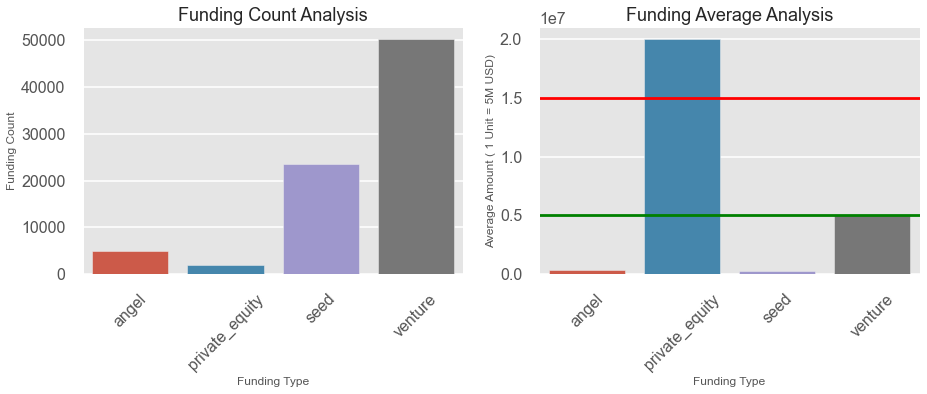

In [177]:
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)

sub1 = sns.barplot(x=total_funding_count.index, y=total_funding_count.values.ravel(), data=total_funding_count, ax=ax1)
sub1.set(xlabel='Funding Type', ylabel='Funding Count')
sub1.set_xticklabels(labels=total_funding_count.index, rotation=45)
sub1.set_title('Funding Count Analysis',fontsize=18)

sub2 = sns.barplot(x=average_funding.index, y='raised_amount_usd', data=average_funding, ax=ax2)
sub2.set(xlabel='Funding Type', ylabel='Average Amount ( 1 Unit = 5M USD)')
sub2.set_xticklabels(labels=average_funding.index, rotation=45)
sub2.set_title('Funding Average Analysis',fontsize=18)
plt.axhline(5_000_000, color='green')
plt.axhline(15_000_000, color='red')
plt.show()

### Top 9 countries against the total amount of investments of funding type `Venture`

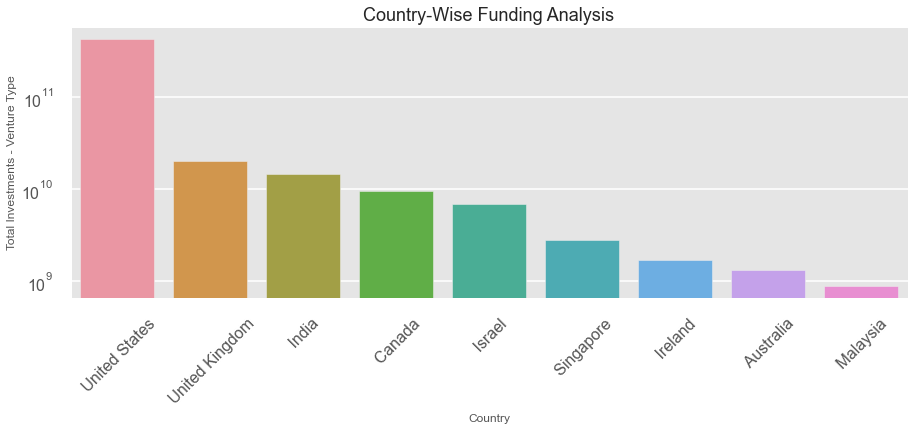

In [178]:
plt.figure(figsize=(15, 5))
chart2 = sns.barplot(x=top9.index.get_level_values('country'), y=top9.values.ravel())
chart2.set(xlabel='Country', ylabel='Total Investments - Venture Type')
chart2.set_xticklabels(labels=top9.index.get_level_values('country'), rotation=45)
chart2.set_yscale('log')
chart2.set_title('Country-Wise Funding Analysis',fontsize=18)
plt.show()

### The number of investments in the top 3 sectors of the top 3 countries on one chart
Appending the D1, D2 and D3 dataframes for their respective top sectors.

In [179]:
Main_D = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
Main_D.shape

(7964, 14)

In [180]:
Main_D = Main_D.append(D2[D2['main_sector'].isin(
    ['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)
Main_D.shape

(8372, 14)

In [181]:
Main_D = Main_D.append(D3[D3['main_sector'].isin(
    ['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)
Main_D.shape

(8594, 14)

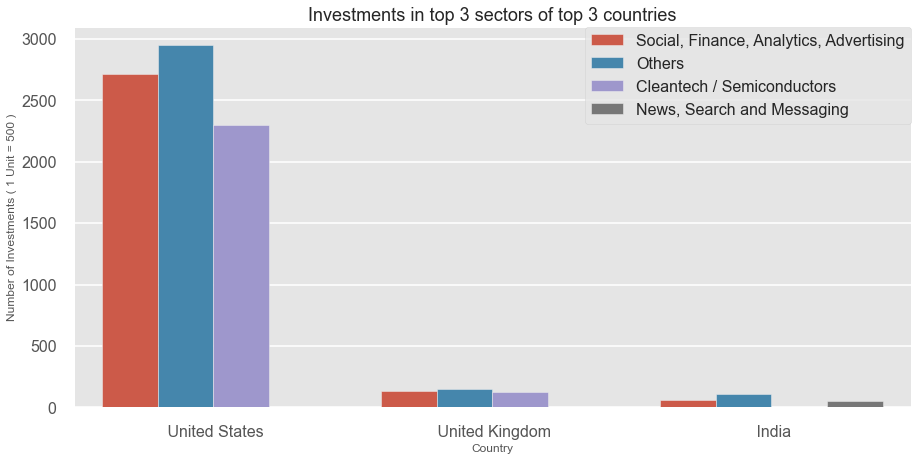

In [182]:
plt.figure(figsize=(15, 7))
top3_chart = sns.barplot(x='country', y='raised_amount_usd', hue='main_sector', data=Main_D, estimator=lambda x: len(x))
top3_chart.set(xlabel='Country', ylabel='Number of Investments ( 1 Unit = 500 )')
top3_chart.set_title('Investments in top 3 sectors of top 3 countries', fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.show()